<a href="https://colab.research.google.com/github/sanu1230/Academic-Project/blob/master/DT_%26_RF_Kidney_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Kidney Disease Dataset
## Data Descriptions

Predicting Chronic Kidney Disease based on health records.

Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).


##**Business Requirement:** 
Classify whether the patients have "Classification" column 'ckd' or 'notckd'. This means whether the patient has kidney disorder or not.

In [20]:
# Importing the dataset and libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
kidney_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UpX/ML Projects/kidney_disease.csv')

In [23]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


** There are 26 columns **

In [24]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Feature engineering

Changing all the categorical columns and object datatype columns

** There are a lot of object data types. We need to convert them to numeric before any further processing **

In [25]:
kidney_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

** These columns have numerical values but have object dtype **

In [26]:
#These columns have \t? values

kidney_df.drop(kidney_df.index[[66,214,185, 133, 162]], inplace=True)

In [27]:
kidney_df[['pcv','wc','rc']] = kidney_df[['pcv','wc','rc']].apply(pd.to_numeric)

**These columns are categorical**

In [28]:
kidney_df[['htn','dm','cad','pe','ane']] = kidney_df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney_df['dm'] = kidney_df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney_df['cad'] = kidney_df['cad'].replace(to_replace='\tno',value=0)

kidney_df[['rbc','pc']] = kidney_df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney_df[['pcc','ba']] = kidney_df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

kidney_df[['appet']] = kidney_df[['appet']].replace(to_replace={'good':1,'poor':0})  #,'no':np.nan
kidney_df['classification'] = kidney_df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0})  #,'no':0.0
kidney_df.rename(columns={'classification':'class'},inplace=True)

In [29]:
kidney_df['pe'] = kidney_df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney_df['appet'] = kidney_df['appet'].replace(to_replace='no',value=0)

# Dropping the index column
kidney_df.drop('id',axis=1,inplace=True)

In [30]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     386 non-null    float64
 1   bp      384 non-null    float64
 2   sg      349 non-null    float64
 3   al      350 non-null    float64
 4   su      347 non-null    float64
 5   rbc     246 non-null    float64
 6   pc      331 non-null    float64
 7   pcc     391 non-null    float64
 8   ba      391 non-null    float64
 9   bgr     351 non-null    float64
 10  bu      376 non-null    float64
 11  sc      378 non-null    float64
 12  sod     309 non-null    float64
 13  pot     308 non-null    float64
 14  hemo    344 non-null    float64
 15  pcv     325 non-null    float64
 16  wc      291 non-null    float64
 17  rc      267 non-null    float64
 18  htn     393 non-null    float64
 19  dm      393 non-null    float64
 20  cad     393 non-null    float64
 21  appet   394 non-null    float64
 22  pe

** Now we have converted all the object columns in float64 **

## Missing values

In [31]:
# There are null values in almost all columns

kidney_df.isnull().sum()

age        9
bp        11
sg        46
al        45
su        48
rbc      149
pc        64
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       86
pot       87
hemo      51
pcv       70
wc       104
rc       128
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

** We will drop 3 columns **
rbc, wc, rc

In [32]:
kidney_df.drop(['rbc','wc','rc'], axis=1, inplace=True)

In [33]:
kidney_df = kidney_df.fillna(kidney_df.mean())

## Descriptive Statistics 

In [34]:
kidney_df.describe()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,51.455959,76.432292,1.017407,1.008571,0.455331,0.226586,0.107417,0.056266,148.031339,57.479255,3.086640,137.597087,4.628247,12.534012,38.898462,0.368957,0.340967,0.086514,0.791878,0.190355,0.152284,0.620253
std,16.845351,13.500540,0.005397,1.269492,1.034994,0.383697,0.308461,0.229556,75.138023,49.416675,5.648511,9.230974,2.837424,2.728991,8.195215,0.481909,0.473432,0.280765,0.405964,0.392581,0.359296,0.485939
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.850000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,1.017407,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,44.000000,1.400000,137.597087,4.628247,12.534012,38.898462,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.455331,0.226586,0.000000,0.000000,149.015670,62.500000,3.086640,141.000000,4.800000,14.700000,44.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Performing EDA & correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cd111dbe0>,
      dtype=object)

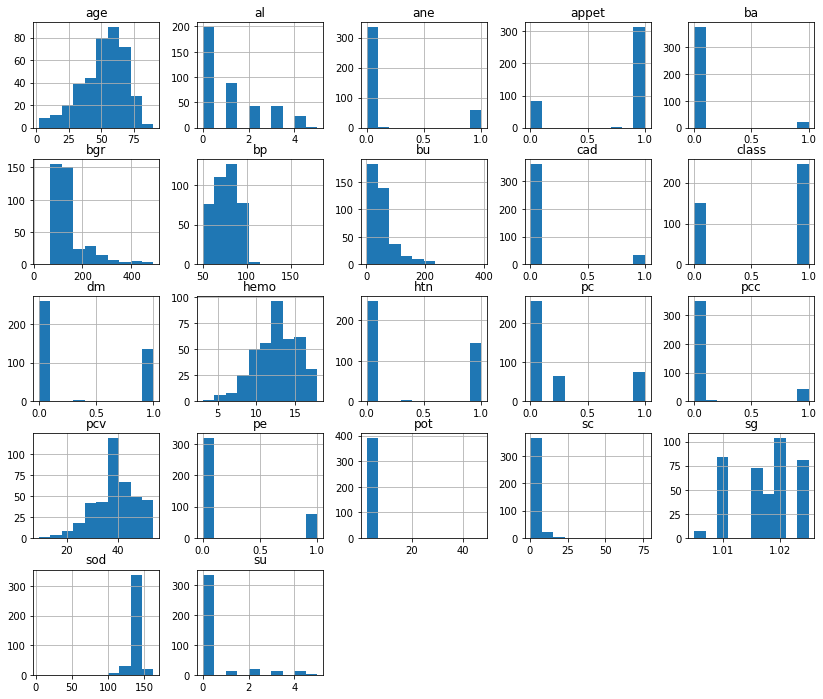

In [35]:
kidney_df.hist(bins=10, figsize=(14,12))

** A lot of values are discountinous **

## Classification using Decision Tree

In [36]:
X = kidney_df.drop('class', axis=1)
y = kidney_df['class']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

tree.fit(X_train, y_train)
pred = tree.predict(X_test) 

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report: \n ", classification_report(y_test, pred))

Classification Report: 
                precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        45
         1.0       0.97      0.99      0.98        74

    accuracy                           0.97       119
   macro avg       0.98      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



In [41]:
print("Confusion Matrix: \n ", confusion_matrix(y_test, pred))

Confusion Matrix: 
  [[43  2]
 [ 1 73]]


In [42]:
y_test.value_counts()

1.0    74
0.0    45
Name: class, dtype: int64

In [ ]:
#(y_test > pred).sum()

** Recall should be greater than precision. ** <br>

TN = 43 <br>
TP = 73 <br>
FP = 2  <br>
FN = 1 <br>

Precision for class 1 is TP/(TP+FP) = 73/(73+2) = 0.97

Recall for class 1 is TP/(TP+FN) = 73/(73+1) = 0.99


In [43]:
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  0.9747899159663865


## Classification using Random Forest

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

pred = forest.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report: \n ", classification_report(y_test, pred))

Classification Report: 
                precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        45
         1.0       1.00      0.99      0.99        74

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



In [46]:
print("Confusion Matrix: \n ", confusion_matrix(y_test, pred))

Confusion Matrix: 
  [[45  0]
 [ 1 73]]


TP = 73 <br>
TN = 45  <br>
FP = 0 <br>
FN = 1 <br>

Precision = 73/73 = 1  <br>
Recall = 73/(73+1) = 0.99